# ANALISIS COVID-19 DI INDONESIA

## Pendahuluan

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.
Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.


Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://data.covid19.go.id/public/api/update.json.


In [1]:
import requests as rq

In [2]:
link = rq.get('https://data.covid19.go.id/public/api/update.json')

In [3]:
print (link)

<Response [200]>


In [4]:
print (link.headers)

{'Server': 'nginx', 'Date': 'Sun, 04 Apr 2021 12:23:43 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Sun, 04 Apr 2021 12:20:47 GMT', 'ETag': 'W/"6069af1f-2580a"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [5]:
cov_id_raw = link.json()

Cari tau jumlah data pada cov_id_raw dengan fungsi len
dan melihat komponen apa saja yang ada di cov_id_raw

In [6]:
print ('Length of cov_id_raw : %d.' %len(cov_id_raw))
print ('Komponen cov_id_raw : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).


In [7]:
cov_id_update

{'penambahan': {'jumlah_positif': 6731,
  'jumlah_meninggal': 427,
  'jumlah_sembuh': 9663,
  'jumlah_dirawat': -3359,
  'tanggal': '2021-04-04',
  'created': '2021-04-04 16:52:36'},
 'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
   'key': 1583107200000,
   'doc_count': 1,
   'jumlah_meninggal': {'value': 0},
   'jumlah_sembuh': {'value': 0},
   'jumlah_positif': {'value': 2},
   'jumlah_dirawat': {'value': 2},
   'jumlah_positif_kum': {'value': 2},
   'jumlah_sembuh_kum': {'value': 0},
   'jumlah_meninggal_kum': {'value': 0},
   'jumlah_dirawat_kum': {'value': 2}},
  {'key_as_string': '2020-03-03T00:00:00.000Z',
   'key': 1583193600000,
   'doc_count': 1,
   'jumlah_meninggal': {'value': 0},
   'jumlah_sembuh': {'value': 0},
   'jumlah_positif': {'value': 0},
   'jumlah_dirawat': {'value': 0},
   'jumlah_positif_kum': {'value': 2},
   'jumlah_sembuh_kum': {'value': 0},
   'jumlah_meninggal_kum': {'value': 0},
   'jumlah_dirawat_kum': {'value': 2}},
  {'key_as_string': '2020

In [8]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-04-04
Jumlah penambahan kasus sembuh : 9663
Jumlah penambahan kasus meninggal : 427
Jumlah total kasus positif hingga saat ini : 1534255
Jumlah total kasus meninggal hingga saat ini: 41669


# Analisis Data COVID-19 di Banten

In [9]:
import requests
resp_banten = requests.get('https://data.covid19.go.id/public/api/prov_detail_BANTEN.json')
cov_banten_raw = resp_banten.json()

In [10]:
print (resp_banten)

<Response [200]>


In [11]:
print('Nama-nama elemen utama:\n', cov_banten_raw.keys())
print('\nJumlah total kasus COVID-19 di Banten : %d' %cov_banten_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Banten : %f.2%%' %cov_banten_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Banten : %f.2%%' %cov_banten_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Banten : 36162
Persentase kematian akibat COVID-19 di Banten : 1.786406.2%
Persentase tingkat kesembuhan dari COVID-19 di Banten : 80.147669.2%


In [12]:
import numpy as np
import pandas as pd
cov_banten= pd.DataFrame(cov_banten_raw['list_perkembangan'])
print('Info cov_banten:\n', cov_banten.info())
print('\nLima data teratas cov_banten:\n', cov_banten.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       388 non-null    int64
 1   KASUS                         388 non-null    int64
 2   MENINGGAL                     388 non-null    int64
 3   SEMBUH                        388 non-null    int64
 4   DIRAWAT_OR_ISOLASI            388 non-null    int64
 5   AKUMULASI_KASUS               388 non-null    int64
 6   AKUMULASI_SEMBUH              388 non-null    int64
 7   AKUMULASI_MENINGGAL           388 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  388 non-null    int64
dtypes: int64(9)
memory usage: 27.4 KB
Info cov_banten:
 None

Lima data teratas cov_banten:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583452800000      1          0       0                   1   
1  1583539200000      0          0       0 

In [13]:
cov_banten_tidy = (cov_banten.drop(columns=[item for item in cov_banten.columns
if item.startswith('AKUMULASI')
or item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_banten_tidy['tanggal'] = pd.to_datetime(cov_banten_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_banten_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-06           1          0       0
1 2020-03-07           0          0       0
2 2020-03-08           1          0       0
3 2020-03-09           0          0       0
4 2020-03-10           0          0       0


<Figure size 432x288 with 0 Axes>

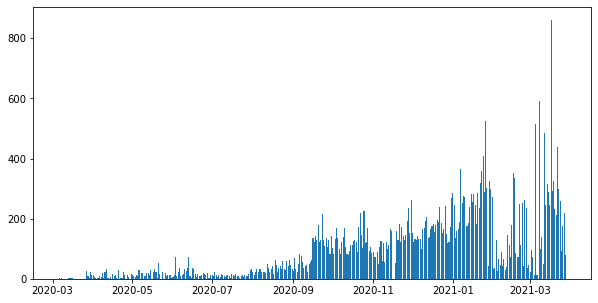

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_banten_tidy, x='tanggal', height='kasus_baru')
plt.show()
plt.savefig('gambar2.png')

<Figure size 432x288 with 0 Axes>

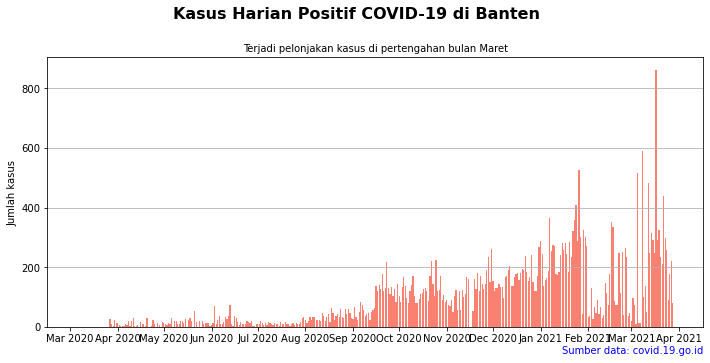

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_banten_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Banten',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di pertengahan bulan Maret',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

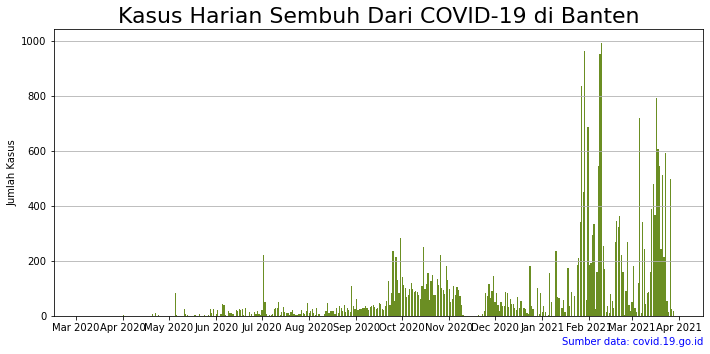

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_banten_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Banten',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

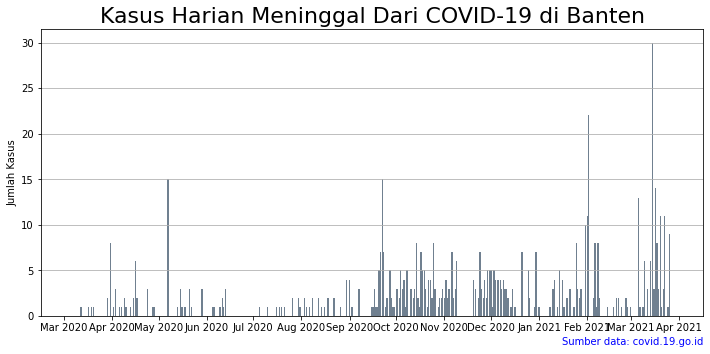

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_banten_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Banten',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
cov_banten_pekanan = (cov_banten_tidy.set_index('tanggal')['kasus_baru']
.resample('W')
.sum()
.reset_index()
.rename(columns={'kasus_baru': 'jumlah'})
)
cov_banten_pekanan['tahun'] = cov_banten_pekanan['tanggal'].apply(lambda x: x.year)
cov_banten_pekanan['pekan_ke'] = cov_banten_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_banten_pekanan = cov_banten_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_banten_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_banten_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     56 non-null     int64
 1   pekan_ke  56 non-null     int64
 2   jumlah    56 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       2
1   2020        11       3
2   2020        12       1
3   2020        13      37
4   2020        14      65


In [20]:
cov_banten_pekanan['jumlah_pekanlalu'] = cov_banten_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_banten_pekanan['lebih_baik'] = cov_banten_pekanan['jumlah'] < cov_banten_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_banten_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       2                 0       False
1   2020        11       3                 2       False
2   2020        12       1                 3        True
3   2020        13      37                 1       False
4   2020        14      65                37       False
5   2020        15      92                65       False
6   2020        16      46                92        True
7   2020        17      67                46       False
8   2020        18      62                67        True
9   2020        19     103                62       False


<Figure size 432x288 with 0 Axes>

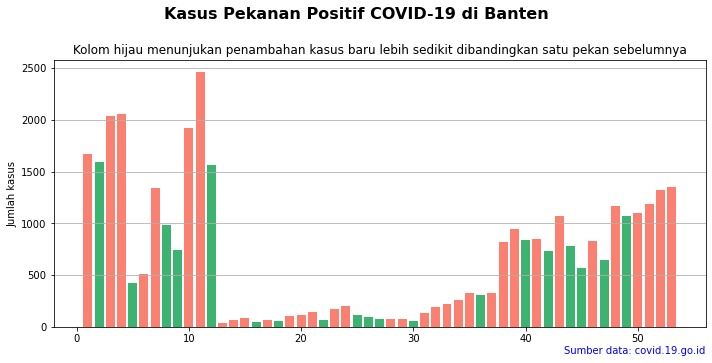

In [21]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_banten_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_banten_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Banten',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [22]:
cov_banten_akumulasi = cov_banten_tidy[['tanggal']].copy()
cov_banten_akumulasi['akumulasi_aktif'] = (cov_banten_tidy['kasus_baru'] - cov_banten_tidy['sembuh'] - cov_banten_tidy['meninggal']).cumsum()
cov_banten_akumulasi['akumulasi_sembuh'] = cov_banten_tidy['sembuh'].cumsum()
cov_banten_akumulasi['akumulasi_meninggal'] = cov_banten_tidy['meninggal'].cumsum()
cov_banten_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
383,2021-03-24,6507,28396,635
384,2021-03-25,6584,28409,636
385,2021-03-26,6253,28907,645
386,2021-03-27,6446,28934,645
387,2021-03-28,6507,28952,645


<Figure size 432x288 with 0 Axes>

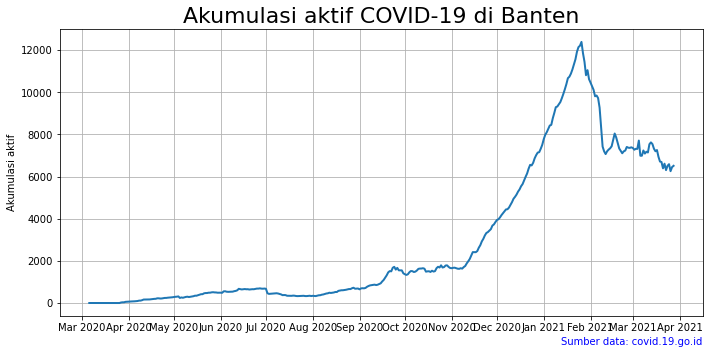

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_banten_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Banten',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_banten_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon','slategrey','olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Banten', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()
plt.savefig('dinamika.png')